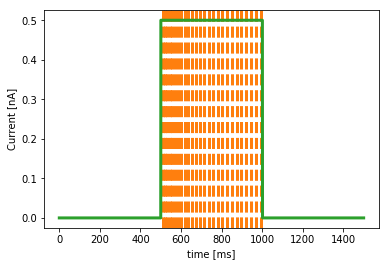

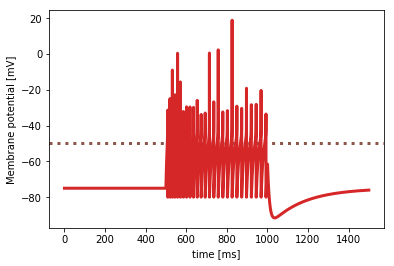

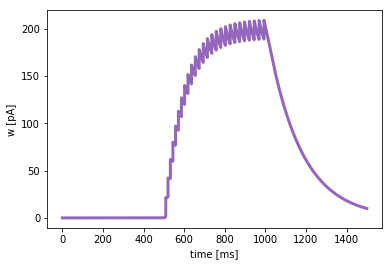

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

# Descrição dos parâmetros
C = 100*pF; gL = 10*nS; EL = -75*mV; VT = -50*mV; DeltaT = 2*mV; tauw = 200*ms; a = 2*nS; b = 0.02*nA; Vmax = 20*mV; 
vreset = -80*mV; duration = 1500*ms; w_0 = 0*nA;

# Corrente de entrada
Ix = input_factory.get_step_current(
    t_start=500, t_end=1000, unit_time=b2.ms,
    amplitude= 500*pA) 

# Descrição do modelo neurônio 
start_scope()
eqs = '''dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + Ix(t,i))/C : volt
         dw/dt=(a*(vm-EL)-w)/tauw : amp
         I : amp'''
G = NeuronGroup(1, eqs,
                    threshold='vm > Vmax',
                    reset='vm= vreset; w = w + b', method='euler', dt= 0.1*ms)

statemon = StateMonitor(G, ["vm","w"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G) # monitor de spikes
G.vm = EL
G.w = w_0

# Tempo de simulação
b2.run(duration)

# Plot
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
plt.figure(1)
current= Ix(statemon.t,0)
plt.plot(statemon.t/b2.ms, current/b2.nA, c='C2', lw=3)
xlabel('time [ms]')
ylabel('Current [nA]')
plt.figure(2)
axhline(-50, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, statemon.vm[0]/b2.mV, c='C3', lw=3)
xlabel('time [ms]')
ylabel('Membrane potential [mV]')
plt.figure(3)
plt.plot(statemon.t/b2.ms, statemon.w[0]/b2.pA, c='C4', lw=3)
xlabel('time [ms]')
ylabel('w [pA]')
plt.show()

